<a href="https://colab.research.google.com/github/kushshah777/MachineLearningAssignment2/blob/master/Architecture2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import numpy as np
import matplotlib.pyplot as plt

Initialize Parameters


In [0]:
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'


In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

X_folds = np.array_split(x_train, 5)
print(X_folds[4].shape)
y_folds = np.array_split(y_train, 5)
scores = list()


X_train = list(X_folds)
X_val = X_train.pop(4)
X_train = np.concatenate(X_train)
y_train = list(y_folds)
y_val = y_train.pop(4)
y_train = np.concatenate(y_train)

print(len(X_train))
print(len(y_train))
print(len(X_val))
print(len(y_val))


X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255
X_val /= 255


y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
(10000, 32, 32, 3)
40000
40000
10000
10000


Not using data augmentation.
Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 29s 726us/step - loss: 1.8067 - acc: 0.3386 - val_loss: 1.7141 - val_acc: 0.3869
Epoch 2/100
40000/40000 [==============================] - 20s 489us/step - loss: 1.5073 - acc: 0.4525 - val_loss: 1.3664 - val_acc: 0.5158
Epoch 3/100
40000/40000 [==============================] - 26s 651us/step - loss: 1.3595 - acc: 0.5110 - val_loss: 1.3025 - val_acc: 0.5425
Epoch 4/100
40000/40000 [==============================] - 23s 565us/step - loss: 1.2510 - acc: 0.5536 - val_loss: 1.1783 - val_acc: 0.5903
Epoch 5/100
40000/40000 [==============================] - 24s 590us/step - loss: 1.1716 - acc: 0.5839 - val_loss: 1.0819 - val_acc: 0.6223
Epoch 6/100
40000/40000 [==============================] - 31s 786us/step - loss: 1.1040 - acc: 0.6109 - val_loss: 1.0628 - val_acc: 0.6274
Epoch 7/100
40000/40000 [==============================] - 31s 782us/step - loss:

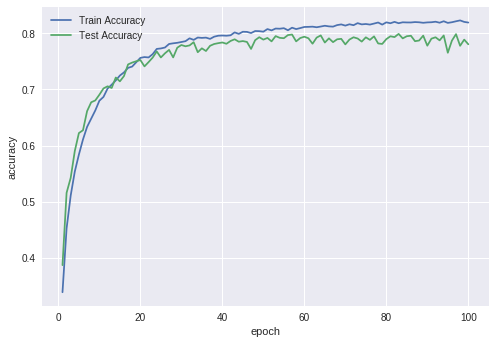

validation loss: 0.7214990921974183
validation accuracy: 0.7806


In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
if not data_augmentation:
    print('Not using data augmentation.')
    modelhistory=model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(X_val, y_val),
              shuffle=True)
    score = model.evaluate(X_val, y_val, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    print(score)
    print(modelhistory.history)
    plotaccuracy = plt.plot(range(1,epochs+1),modelhistory.history['acc'],range(1,epochs+1),modelhistory.history['val_acc'])
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(('Train Accuracy','Test Accuracy'))
    plt.show(plotaccuracy)

    print('validation loss:',modelhistory.history['val_loss'][-1])
    print('validation accuracy:',modelhistory.history['val_acc'][-1])

